In [15]:
import sys
sys.path.append("../../../")

## 数据

In [16]:
from pylib.utils.functions_for_classification import lin_separable_2d_2cls, plot_scatter
import matplotlib.pyplot as plt

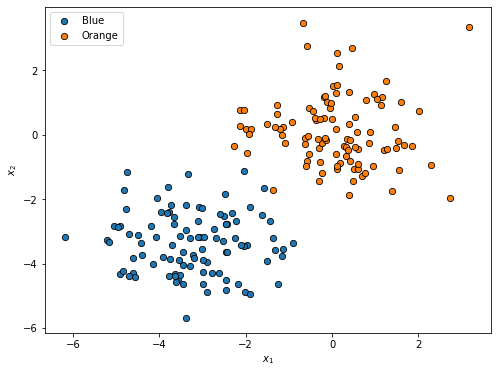

In [17]:
X, y = lin_separable_2d_2cls(200)
plt.figure(figsize=(8, 6))
plot_scatter(X, y)
plt.show()

## 逻辑斯蒂回归

In [18]:
from sklearn.base import BaseEstimator, ClassifierMixin
from pylib.utils.functions_for_classification import plot_decision_boundary
import numpy as np

In [19]:
class LogisticRegression(BaseEstimator, ClassifierMixin):
    """逻辑斯蒂回归
    
    参数
    ----
    learning_rate: 在梯度下降中，更新权重所用的步长
    max_iter: 在梯度下降中，所用迭代的最大步数
    W0: 权重初始值，默认为None，即使用随机初始化
    random_state: 随机数生成器的种子
    
    
    属性
    ----
    W: 最终迭代后的权重
    """
    def __init__(self, learning_rate=0.1, max_iter=200, 
                 W0=None, random_state=None):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.W0 = W0
        self.seed = random_state
    
    # S型函数
    def __sigmoid_function(self, X, W):
        return 1 / (1 + np.exp(-X @ W))
    
    # 交叉熵成本函数
    def __binary_cross_entropy(self, X, W, y):
        X0 = X[y == 0]
        y_pred0 = self.__sigmoid_function(X0, W)
        X1 = X[y == 1]
        y_pred1 = self.__sigmoid_function(X1, W)
        epsilon = 1e-8
        loss = 1/len(y) * (-np.sum(np.log(1 - y_pred0 + epsilon)) - \
                           np.sum(np.log(y_pred1 + epsilon)))

        return loss
    
    # 梯度函数
    def __negative_gradient(self, X, W, y):
        y_pred = self.__sigmoid_function(X, W)
        grad = X.T @ (y_pred - y)
        return -grad
    
    # 梯度下降
    def __gradient_descent(self, X, W, y):
        weight_history = [W.copy()]
        loss = self.__binary_cross_entropy(X, W, y)
        loss_history = [loss]
        tol = 1e-4
        for e in range(1, self.max_iter+1):
            neg_grad = self.__negative_gradient(X, W, y)
            W += self.learning_rate * neg_grad # 权重更新
            weight_history.append(W.copy()) # 记录权重更新历史
            weight_change = np.sum(np.abs(np.abs(weight_history[-1]) - \
                                      np.abs(weight_history[-2])))
            if weight_change < tol or loss < tol:
                break
            loss = self.__binary_cross_entropy(X, W, y)
            loss_history.append(loss)
            
        if weight_change > tol and loss_history[-1] > tol:
            print("Logistic regression dosen't converge!")
        
        return weight_history, loss_history
    
    def fit(self, X, y=None):
        X = np.c_[np.ones(len(X)), X]
        p = X.shape[1]
        if self.W0 != None:
            self.W = self.W0
        else:
            # 随机初始化权重
            np.random.seed(self.seed)
            W0 = np.random.randn(p)
        self.weight_history, self.loss_history = self.__gradient_descent(X, W0, y)
        self.W = self.weight_history[-1]
        
        return self
    
    def predict_proba(self, X):
        X = np.c_[np.ones(len(X)), X]
        y_proba = self.__sigmoid_function(X, self.W)
        
        return y_proba
    
    def predict(self, X):
        y_proba = self.predict_proba(X)
        y_pred = np.where(y_proba >= 0.5, 1, 0)
        
        return y_pred

In [20]:
log_reg = LogisticRegression(
    learning_rate=2.0, max_iter=100, random_state=42)
log_reg.fit(X, y)

E:\a-soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


LogisticRegression(W0=None, learning_rate=2.0, max_iter=100, random_state=None)

In [21]:
err = 1 - log_reg.score(X, y)
print("样本误差：{:.3f}".format(err))

样本误差：0.000


In [22]:
# 最终得到的系数
W = log_reg.W
W

array([164.18396748,  56.67937807,  48.34513123])

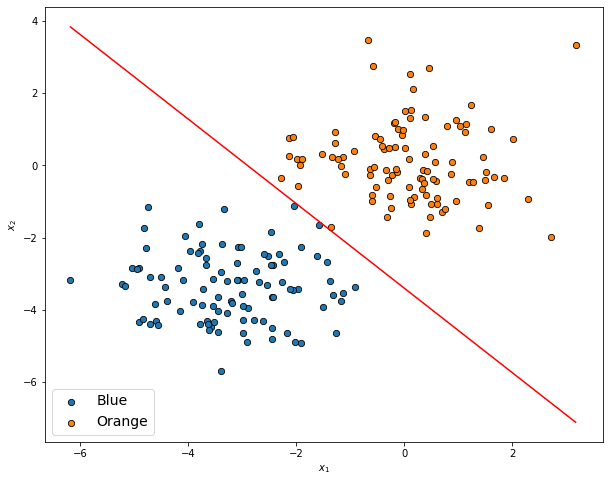

In [23]:
# 画出决策边界
x1n = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2n = (0 - W[0] - W[1] * x1n) / W[2]

plt.figure(figsize=(10, 8))
plot_scatter(X, y)
plt.plot(x1n, x2n, 'r')
plt.legend(fontsize=14)
plt.show()

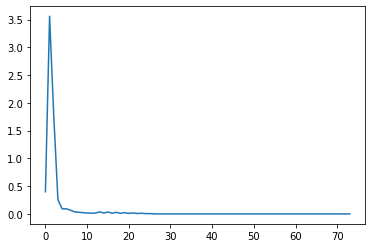

In [24]:
# 绘制历史损失值曲线
loss_history = log_reg.loss_history
plt.plot(range(len(loss_history)), loss_history)
plt.show()

## 使用 `sklearn`

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
sk_lr = LogisticRegression(C=10000, solver='liblinear')
sk_lr.fit(X, y)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
err = 1 - sk_lr.score(X, y)
print("样本误差：{:.3f}".format(err))

样本误差：0.000


In [28]:
# 系数
sk_lr.coef_, sk_lr.intercept_

(array([[24.07077751, 17.19275913]]), array([64.31266891]))

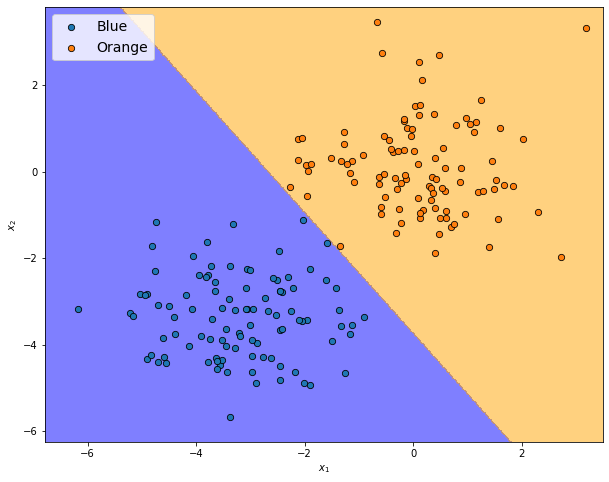

In [29]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X, y, classifier=sk_lr)
plt.show()